## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej (y) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

[1.1]


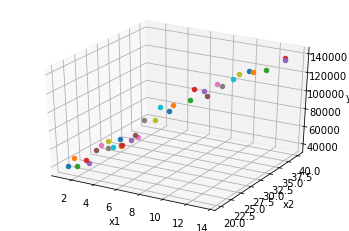

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/Salary.csv', sep=',')
x1 = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
x2 = df['Age'].values.reshape(df['Age'].shape[0], 1)

y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

tempX = df.to_numpy()[:,:2]
X = np.insert(tempX, 0, 1, axis=1)
Y = df.to_numpy()[:, 2].T

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.set_xlabel("x1") 
ax.set_ylabel("x2")
ax.set_zlabel("y")
print(x1[0])
for i in zip(x1, x2, y):
    ax.scatter(i[0], i[1], i[2], marker='o')

plt.show(fig)


## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [19]:
from random import random

def F(X, B):
    return np.dot(X, B)
def SSR(FXminusY):
    return sum(FXminusY**2)/(2*len(FXminusY))
def learn_and_fit(X, Y):
    B = np.array([[0.5] for i in range(len(X[0]))])
    epoch = 2500
    alfa = 0.002
    betas = []
    errors = []
    for i in range(epoch):
        FX = np.dot(X, B)
        FXminusY = (FX.T - Y).T
        ssr = SSR(FXminusY)
        dSSR = np.dot(X.T, FXminusY) / len(X)
        B = B - alfa * dSSR
        betas.append(B)
        errors.append(ssr)
    return betas, errors

betas, errors = learn_and_fit(X,Y)

### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Pokaż w formie animacji, jak zmieniała się regresja w kolejnych epokach.

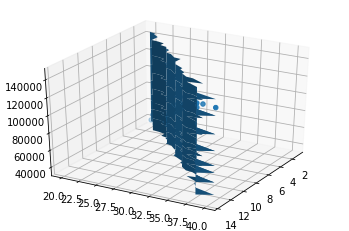

In [20]:
Z = F(X, betas[-1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.T[1], X.T[2], y, marker='o')
ax.plot_surface(X.T[1], X.T[2], Z, rstride=5, cstride=5)
ax.view_init(30, 30)


### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [21]:
# YOUR CODE HERE
df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
tempX = df.to_numpy()[:,:5]
X = np.insert(tempX, 0, 1, axis=1)
Y = df.to_numpy()[:, 6].T
betas, errors = learn_and_fit(X, Y)
print(errors[-1])

[3983.60533986]


### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

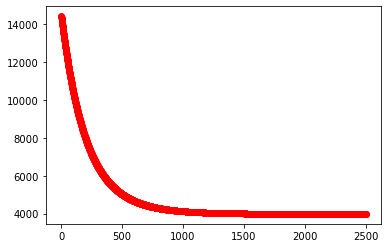

In [22]:
# YOUR CODE HERE
fig = plt.figure()
xw = range(0, len(errors))
errors2 = [i[0] for i in errors]
plt.plot(xw, errors2, 'ro')
plt.show()
#Błąd przestaje się znaczoąco zmieniać po 1500 epokach, więc nie ma sensu uczyć modelu więcej razy. Uczenie 